In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,skew,normaltest

In [2]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
df=pd.read_csv('downloads/Employee.csv')

In [4]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,NaN,Chennai,India,0
1,Infosys,30.0,NaN,Mumbai,India,0
2,TCS,35.0,2300.0,Calcutta,India,0
3,Infosys,40.0,3000.0,Delhi,India,0
4,TCS,23.0,4000.0,Mumbai,India,0


In [5]:
df.describe()

,Age,Salary,Gender
count,130.000000,124.000000,148.000000
mean,30.484615,5312.467742,0.222973
std,11.096640,2573.764683,0.417654
min,0.000000,1089.000000,0.000000
25%,22.000000,3030.000000,0.000000
50%,32.500000,5000.000000,0.000000
75%,37.750000,8000.000000,0.000000
max,54.000000,9876.000000,1.000000


In [6]:
df.count

<bound method DataFrame.count of      Company   Age  Salary     Place Country  Gender
0        TCS  20.0     NaN   Chennai   India       0
1    Infosys  30.0     NaN    Mumbai   India       0
2        TCS  35.0  2300.0  Calcutta   India       0
3    Infosys  40.0  3000.0     Delhi   India       0
4        TCS  23.0  4000.0    Mumbai   India       0
..       ...   ...     ...       ...     ...     ...
143      TCS  33.0  9024.0  Calcutta   India       1
144  Infosys  22.0  8787.0  Calcutta   India       1
145  Infosys  44.0  4034.0     Delhi   India       1
146      TCS  33.0  5034.0    Mumbai   India       1
147  Infosys  22.0  8202.0    Cochin   India       0

[148 rows x 6 columns]>

In [7]:
df.isnull().sum()

Company     8
Age        18
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [14]:
df['Age']=df['Age'].replace(0,np.nan)

In [10]:
df.isnull().sum()

Company     8
Age        24
Salary     24
Place      14
Country     0
Gender      0
dtype: int64

In [15]:
df['Age'].fillna(df['Age'].median(),inplace=True)
df['Salary'].fillna(df['Salary'].mean(),inplace=True)

df['Place'].fillna(df['Place'].mode(),inplace=True)
                 

C:\Users\abhin\AppData\Local\Temp\ipykernel_26336\1371441136.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
C:\Users\abhin\AppData\Local\Temp\ipykernel_26336\1371441136.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

In [16]:
df.head()

,Company,Age,Salary,Place,Country,Gender
0,TCS,20.0,5312.467742,Chennai,India,0
1,Infosys,30.0,5312.467742,Mumbai,India,0
2,TCS,35.0,2300.000000,Calcutta,India,0
3,Infosys,40.0,3000.000000,Delhi,India,0
4,TCS,23.0,4000.000000,Mumbai,India,0


In [19]:
df.isnull().sum()

Company     8
Age         0
Salary      0
Place      14
Country     0
Gender      0
dtype: int64

In [26]:
df.drop_duplicates(inplace=True)

In [32]:
# Select only numeric columns
numeric_cols = df.select_dtypes(include='number')

# Calculate IQR
Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

# Detect outliers
outlier_condition = ((numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR)))
outliers = df[outlier_condition.any(axis=1)]

# Display outliers
outliers


,Company,Age,Salary,Place,Country,Gender
6,TCS,33.0,6000.0,Chennai,India,1
7,Infosys,23.0,7000.0,Mumbai,India,1
8,TCS,34.0,8000.0,Calcutta,India,1
24,TCS,33.0,7084.0,Chennai,India,1
25,Infosys,23.0,8943.0,Mumbai,India,1
26,TCS,34.0,8345.0,Calcutta,India,1
27,CTS,45.0,9284.0,Delhi,India,1
28,CTS,23.0,9876.0,Mumbai,India,1
35,TCS,35.0,9024.0,NaN,India,1
44,TCS,35.0,8000.0,Noida,India,1


In [37]:
filtered_data=df[(df['Age']>40) & (df['Salary']<5000)]

In [38]:
filtered_data

,Company,Age,Salary,Place,Country,Gender
21,Infosys,50.0,3184.0,Delhi,India,0
32,Infosys,45.0,4034.0,Calcutta,India,0
39,Infosys,41.0,3000.0,Mumbai,India,0
50,Infosys,41.0,3000.0,Chennai,India,0
57,Infosys,51.0,3184.0,Hyderabad,India,0
68,Infosys,43.0,4034.0,Mumbai,India,0
75,Infosys,44.0,3000.0,Cochin,India,0
86,Infosys,41.0,3000.0,Delhi,India,0
93,Infosys,54.0,3184.0,Mumbai,India,0
104,Infosys,44.0,4034.0,Delhi,India,0


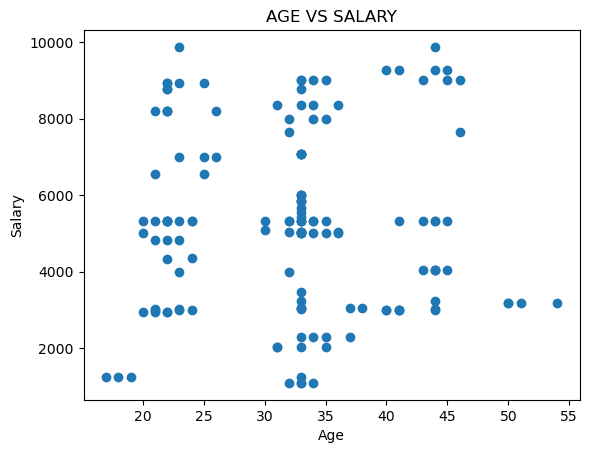

In [39]:
plt.scatter(df['Age'],df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('AGE VS SALARY')
plt.show()

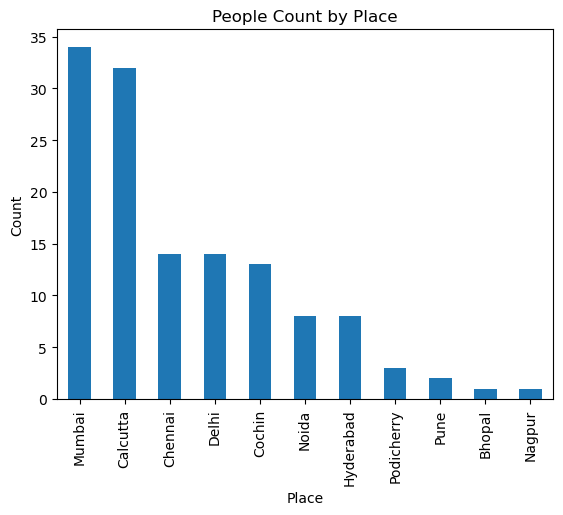

In [41]:
place_counts = df['Place'].value_counts()
place_counts.plot(kind='bar', title='People Count by Place')
plt.xlabel('Place')
plt.ylabel('Count')
plt.show()


In [43]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['place_encoded'] = le.fit_transform(df['Place'])


In [44]:
df = pd.get_dummies(df, columns=['Place'], drop_first=True)


In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['age_scaled_std', 'salary_scaled_std']] = scaler.fit_transform(df[['Age', 'Salary']])


In [46]:
from sklearn.preprocessing import MinMaxScaler

mm_scaler = MinMaxScaler()
df[['age_scaled_mm', 'salary_scaled_mm']] = mm_scaler.fit_transform(df[['Age', 'Salary']])
